# Imported needed Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import os
os.getcwd()
os.chdir('D:\Machine Learning (Pycharm IDE)\S&P 500 --Time Series Analysis')

# Load Dataset

In [3]:
dataset = pd.read_csv('all_stocks_5yr.csv')
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
#allowing cell multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
#check for all stock symbols
dataset.Name.values

array(['AAL', 'AAL', 'AAL', ..., 'ZTS', 'ZTS', 'ZTS'], dtype=object)

For this project, we will analyze Nvidia's stock and forecast its future trend based on its historic stock prices.

In [6]:
#Filter all rows with column 'Name' being NVDA
NVDA = dataset.loc[dataset['Name']=='NVDA']
NVDA.head()

,date,open,high,low,close,volume,Name
422633,2013-02-08,12.370,12.4699,12.29,12.37,7677336,NVDA
422634,2013-02-11,12.470,12.6350,12.35,12.51,10207599,NVDA
422635,2013-02-12,12.395,12.5650,12.38,12.43,6945065,NVDA
422636,2013-02-13,12.440,12.6650,12.33,12.37,21322573,NVDA
422637,2013-02-14,12.200,12.7400,12.05,12.73,22049335,NVDA


In [7]:
#Avoid SettingWithCopyWarning
NVDA1 = NVDA.copy()

#parse strings to datatime type
NVDA1['date'] = pd.to_datetime(NVDA['date'], format="%Y/%m/%d")
NVDA1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 422633 to 423891
Data columns (total 7 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


In [8]:
#For Time Series, only values we need is Close Price and date
data = NVDA1.loc[:,['date', 'close']]
data.rename(columns = {'close' : 'Stock Price', 'date':'Date'}, inplace = True)
data.head(10)

,Date,Stock Price
422633,2013-02-08,12.370
422634,2013-02-11,12.510
422635,2013-02-12,12.430
422636,2013-02-13,12.370
422637,2013-02-14,12.730
422638,2013-02-15,12.731
422639,2013-02-19,12.555
422640,2013-02-20,12.380
422641,2013-02-21,12.290
422642,2013-02-22,12.520


In [9]:
#making date as the index column
indexedDataset = data.set_index('Date')
indexedDataset = indexedDataset.resample('D').mean()
indexedDataset["Stock Price"] = indexedDataset["Stock Price"].interpolate(method='linear', axis=0).ffill().bfill()
indexedDataset.head(15)

,Stock Price
Date,
2013-02-08,12.370000
2013-02-09,12.416667
2013-02-10,12.463333
2013-02-11,12.510000
2013-02-12,12.430000
2013-02-13,12.370000
2013-02-14,12.730000
2013-02-15,12.731000
2013-02-16,12.687000


Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

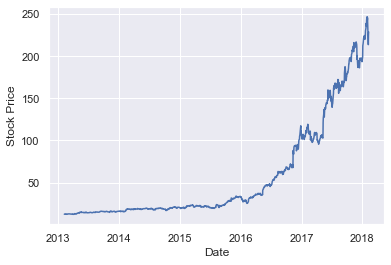

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#using plot to check the overall trend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(indexedDataset)

--A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the Time Series models work on the assumption that the Time Series is stationary. Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

--Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

    1. constant mean
    2. constant variance
    3. an autocovariance that does not depend on time.

# Tests to check for stationarity in our data.
1. Rolling Statistics(Visual Technique): Plot the moving average and moving variance, and see if they varies with time. 
    
2. Augmented Dickey-Fuller(ADF) Test: Null hypothesis is that the time series is non-stationary. The alternative hypothesis is usually stationarity or trend-stationarity.The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

Rolling Statistics

In [11]:
#Determining rolling statistics with window/duration of 12 day period
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean, rolstd)

            Stock Price
Date                   
2013-02-08          NaN
2013-02-09          NaN
2013-02-10          NaN
2013-02-11          NaN
2013-02-12          NaN
2013-02-13          NaN
2013-02-14          NaN
2013-02-15          NaN
2013-02-16          NaN
2013-02-17          NaN
2013-02-18          NaN
2013-02-19    12.542083
2013-02-20    12.542917
2013-02-21    12.532361
2013-02-22    12.537083
2013-02-23    12.531806
2013-02-24    12.527083
2013-02-25    12.521250
2013-02-26    12.491250
2013-02-27    12.480333
2013-02-28    12.478083
2013-03-01    12.483667
2013-03-02    12.491389
2013-03-03    12.501250
2013-03-04    12.524167
2013-03-05    12.566667
2013-03-06    12.589167
2013-03-07    12.615278
2013-03-08    12.652500
2013-03-09    12.692361
...                 ...
2018-01-09   208.743750
2018-01-10   211.258750
2018-01-11   213.685208
2018-01-12   215.898125
2018-01-13   217.929375
2018-01-14   219.778958
2018-01-15   220.475417
2018-01-16   221.018750
2018-01-17   221

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

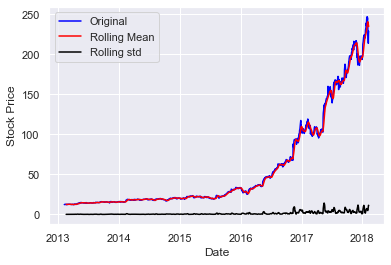

In [12]:
#plot rolling statistics
Orig = plt.plot(indexedDataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title = ('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Stock Price')

--Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. 

Augmented Dickey-Fuller(ADF) Test

In [13]:
#perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller test:')
dftest = adfuller(indexedDataset['Stock Price'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', 'Number Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller test:
Test Statistics                   3.023277
p-value                           1.000000
Number Lags Used                 23.000000
Number of Observations Used    1802.000000
Critical value (1%)              -3.433984
Critical value (5%)              -2.863145
Critical value (10%)             -2.567625
dtype: float64


#From above, we fail to reject the Null hypothesis(Null hypothesis is that the time series is non-stationary) since p-value is >0.05 and Test Statistics(3.444709) is >Critical value (5%), therefore this confirms that our data is not stationary

--One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

# Estimating and Eliminating Trend

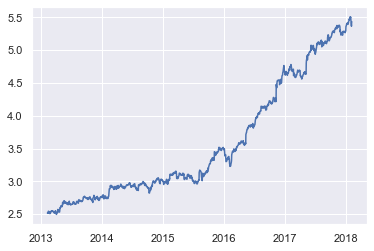

In [14]:
#Estimate the trend
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

    1. Aggregation – taking average for a time period like monthly/weekly averages
    2. Smoothing – taking rolling averages
    3. Polynomial Fitting – fit a regression model

Smoothing

Smoothing refers to taking rolling estimates, i.e. considering the past few instances.

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

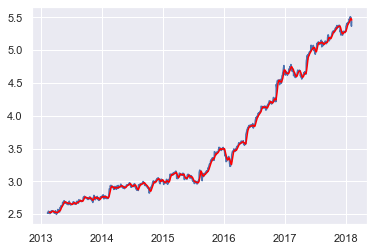

In [15]:
#Determining rolling statistics using log time series with window/duration of 12 day period
movingAverage = indexedDataset_logscale.rolling(window = 12).mean()
movingstd = indexedDataset_logscale.rolling(window = 12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color = 'red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [16]:
datasetLogScaleMinusMovingAverage = indexedDataset_logscale - movingAverage

#removing NaN 
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(12)

,Stock Price
Date,
2013-02-19,0.001082
2013-02-20,-0.013022
2013-02-21,-0.019464
2013-02-22,-0.001300
2013-02-23,-0.006752
2013-02-24,-0.012280
2013-02-25,-0.017752
2013-02-26,-0.009686
2013-02-27,0.009598


Results of Dickey-Fuller test:
Test Statistics               -1.296883e+01
p-value                        3.112088e-24
Number Lags Used               6.000000e+00
Number of Observations Used    1.808000e+03
Critical value (1%)           -3.433972e+00
Critical value (5%)           -2.863140e+00
Critical value (10%)          -2.567622e+00
dtype: float64


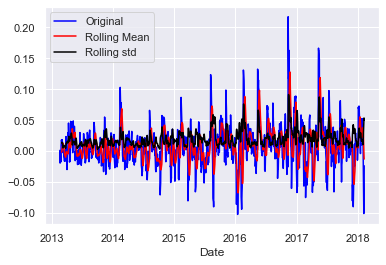

In [17]:
#Tests of stationarity as one function but using 'datasetLogScaleMinusMovingAverage' as our data
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics with window/duration of 12 day period
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    Orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
    plt.legend(loc = 'best')
    plt.xlabel('Date')
    
    #perform Dickey-Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(timeseries['Stock Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', 'Number Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(datasetLogScaleMinusMovingAverage)   

Exponentially weighted moving average

Since we're dealing with a more complex situation i.e forecasting a stock price, i'm going to use exponentially weighted moving average.

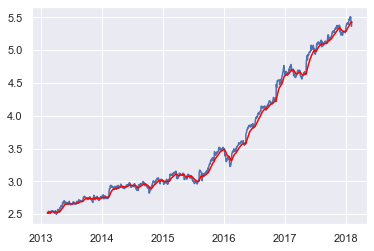

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife =12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay.

,Stock Price
Date,
2013-02-08,0.000000
2013-02-09,0.001828
2013-02-10,0.003611
2013-02-11,0.005349
2013-02-12,-0.000827


Results of Dickey-Fuller test:
Test Statistics               -7.172258e+00
p-value                        2.784819e-10
Number Lags Used               0.000000e+00
Number of Observations Used    1.825000e+03
Critical value (1%)           -3.433938e+00
Critical value (5%)           -2.863125e+00
Critical value (10%)          -2.567614e+00
dtype: float64


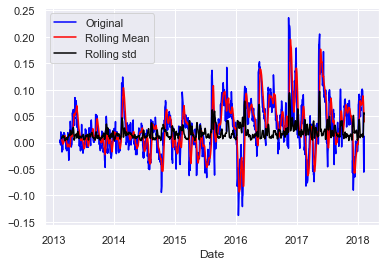

In [19]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
datasetLogScaleMinusMovingExponentialDecayAverage.head()
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

This Time Series has even less variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

# Eliminating Trend and Seasonality

The simple trend reduction techniques i've performed above(exponential_Weighted_Average) don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

    1. Differencing – taking the differece with a particular time lag
    2. Decomposition – modeling both trend and seasonality and removing them from the model.

Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, i take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

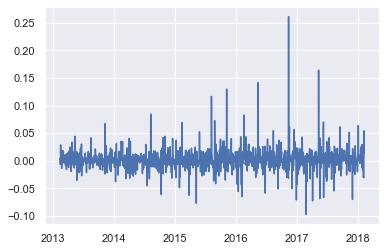

In [20]:
datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

This appears to have reduced trend considerably. Lets verify using our plots:

Results of Dickey-Fuller test:
Test Statistics                 -42.021121
p-value                           0.000000
Number Lags Used                  0.000000
Number of Observations Used    1824.000000
Critical value (1%)              -3.433940
Critical value (5%)              -2.863126
Critical value (10%)             -2.567614
dtype: float64


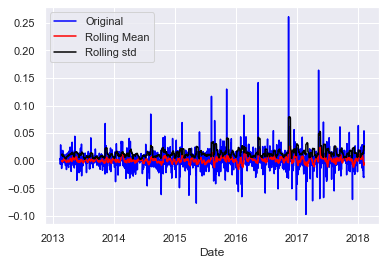

In [21]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

From the plot above, We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

Decomposing

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

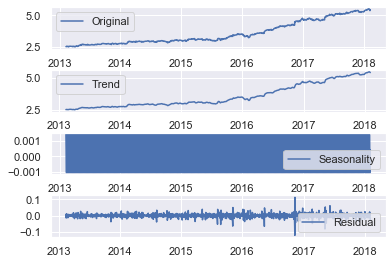

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')
plt.subplots_adjust(wspace = 0.3, hspace = 0.5, left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9)

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

Results of Dickey-Fuller test:
Test Statistics               -1.499166e+01
p-value                        1.123013e-27
Number Lags Used               2.400000e+01
Number of Observations Used    1.795000e+03
Critical value (1%)           -3.433998e+00
Critical value (5%)           -2.863152e+00
Critical value (10%)          -2.567628e+00
dtype: float64


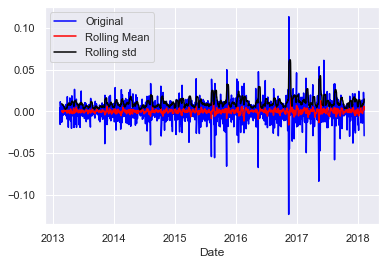

In [23]:
decompositionLogData = residual
decompositionLogData.dropna(inplace = True)
test_stationarity(decompositionLogData)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this Time Series is very close to stationary.

# Forecasting a Time Series

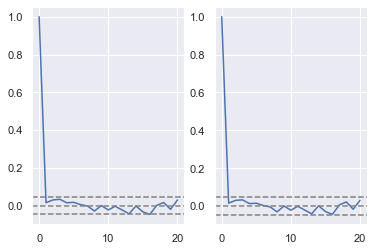

In [24]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.title = ('Autocorrelation Function')


#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'grey')
plt.title = ('Partial Autocorrelation Function')

Plotting AR Model


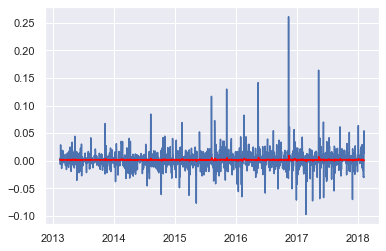

In [25]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logscale, order=(2, 1, 0))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
#plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-datasetLogDiffShifting['Stock Price'])**2))
print('Plotting AR Model')


Plotting MA Model


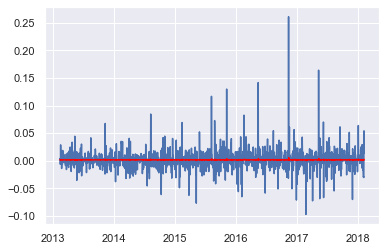

In [26]:
#MA Model 
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logscale, order=(0,1,1))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
#plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-datasetLogDiffShifting['Stock Price'])**2))
print('Plotting MA Model')


Plotting MA Model


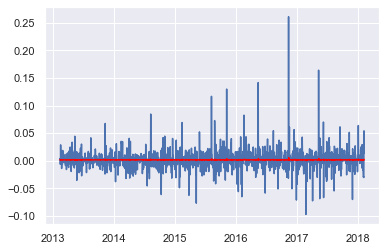

In [27]:
#ARIMA Model 
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logscale, order=(0,1,1))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
#plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-datasetLogDiffShifting['Stock Price'])**2))
print('Plotting MA Model')

In [28]:
prediction_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

Date
2013-02-09    0.001600
2013-02-10    0.001634
2013-02-11    0.001698
2013-02-12    0.001697
2013-02-13    0.001544
Freq: D, dtype: float64


Notice that these start from ‘2013-02-09’ and not ‘2013-02-08’. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [29]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Date
2013-02-09    0.001600
2013-02-10    0.003234
2013-02-11    0.004932
2013-02-12    0.006629
2013-02-13    0.008173
Freq: D, dtype: float64


Next we have to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [30]:
prediction_ARIMA_log = pd.Series(indexedDataset_logscale['Stock Price'].iloc[0], index=indexedDataset_logscale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.tail()

Date
2018-02-03    5.430988
2018-02-04    5.431192
2018-02-05    5.431406
2018-02-06    5.431581
2018-02-07    5.433004
Freq: D, dtype: float64

Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.

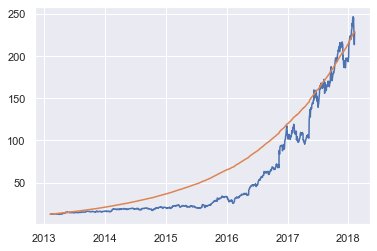

In [31]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(prediction_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_ARIMA-indexedDataset)**2)/len(indexedDataset)))

In [32]:
indexedDataset_logscale.head(15)

,Stock Price
Date,
2013-02-08,2.515274
2013-02-09,2.519040
2013-02-10,2.522791
2013-02-11,2.526528
2013-02-12,2.520113
2013-02-13,2.515274
2013-02-14,2.543961
2013-02-15,2.544040
2013-02-16,2.540578


In [33]:
NVDA1.tail()

,date,open,high,low,close,volume,Name
423887,2018-02-01,238.52,246.90,238.06,240.50,12980572,NVDA
423888,2018-02-02,237.00,237.97,231.17,233.52,17961555,NVDA
423889,2018-02-05,227.00,233.23,205.00,213.70,29130140,NVDA
423890,2018-02-06,204.40,225.70,204.00,225.58,27870031,NVDA
423891,2018-02-07,229.58,234.97,226.70,228.80,20073316,NVDA


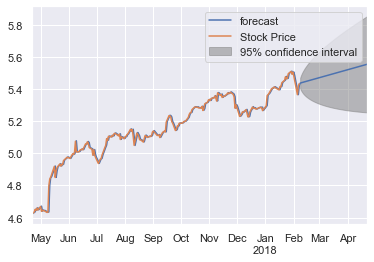

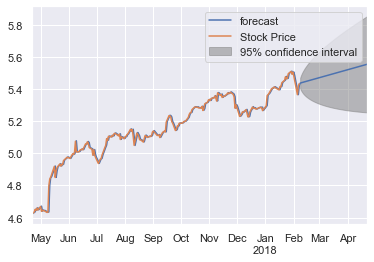

In [34]:
import warnings
warnings.filterwarnings('ignore')
results_AR.plot_predict(start ='2017-04-22', end ='2018-04-22' )
x = results_AR.forecast(steps=120)